# HOUSE PRICE PREDICTION SYSTEM

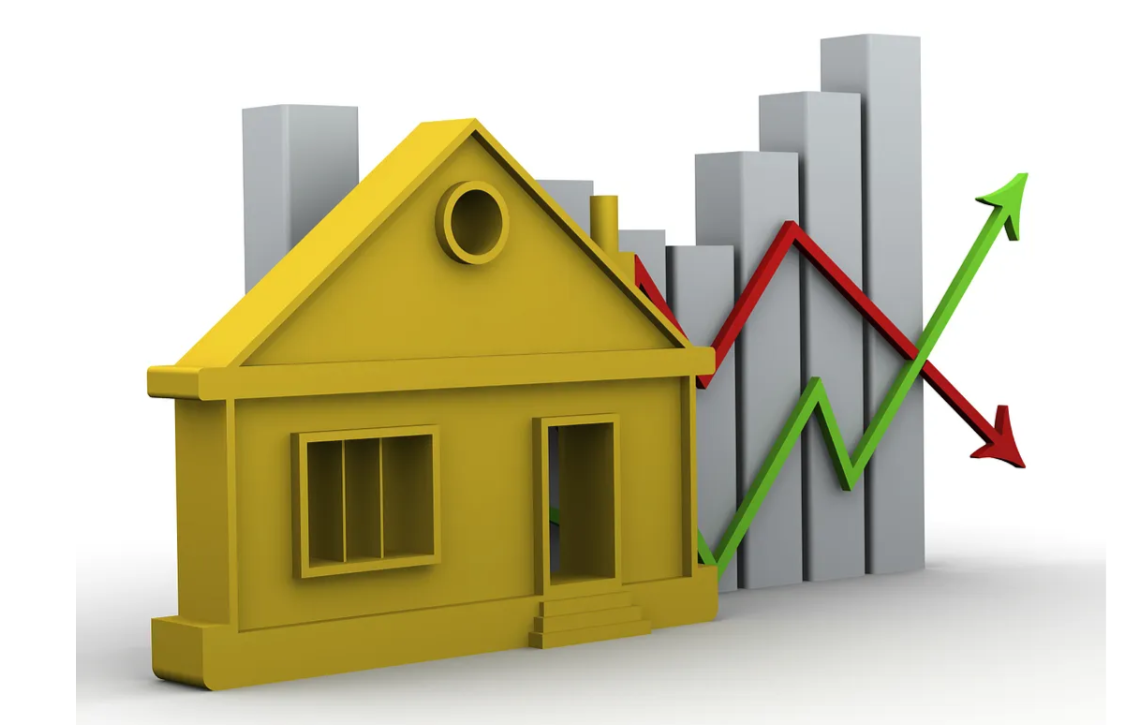

**About the Project & Dataset**

 This project focuses on developing a predictive model to estimate house prices using a comprehensive dataset of residential properties in Ames, Iowa. The dataset, sourced from Kaggle's House Prices: Advanced Regression Techniques competition, includes 79 explanatory variables describing various aspects of the properties, such as location, size, and amenities. By employing advanced machine learning techniques, including data preprocessing, feature engineering, and training a HistGradientBoostingRegressor model, the project aims to provide accurate house price predictions, assisting homebuyers and real estate agents in making informed decisions.

# Importiong the Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading & Preprocessing the Data

In [ ]:
# Load the dataset
data = pd.read_csv('house_data.csv')

# Display the first few rows of the dataset
print(data.head())



   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RL         80.0     9600   Pave   NaN      Reg   
1          30       RM         70.0    11250   Pave  Grvl      IR1   
2          70        C         85.0     9550   Grvl   NaN      IR1   
3         120       FV          NaN    14260   Pave  Pave      IR2   
4         190       RH         90.0    14115   Pave   NaN      Reg   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Bnk    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
3         Low    NoSeWa    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     20850

In [ ]:
missing_values = data_encoded.isnull().sum()
print(missing_values)

MSSubClass              0
LotFrontage             0
LotArea                 0
OverallQual             0
OverallCond             0
                       ..
GarageFinish_Unf        0
GarageQual_TA           0
GarageCond_TA           0
SaleCondition_Normal    0
TotalSF                 0
Length: 86, dtype: int64


In [ ]:
# Checking for missing values
print(data.isnull().sum())

# Example strategies for imputing missing values
# Numerical features
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True)

# Categorical features
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0], inplace=True)
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)


MSSubClass       0
MSZoning         0
LotFrontage      1
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64


In [ ]:
data_encoded.dropna(inplace=True)

In [ ]:
# Convert data types if necessary
data['MSZoning'] = data['MSZoning'].astype('category')
data['Street'] = data['Street'].astype('category')


In [ ]:
# Removing outliers using the IQR method for the 'SalePrice' column
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['SalePrice'] < (Q1 - 1.5 * IQR)) | (data['SalePrice'] > (Q3 + 1.5 * IQR)))]


# Eploratory Data Analysis

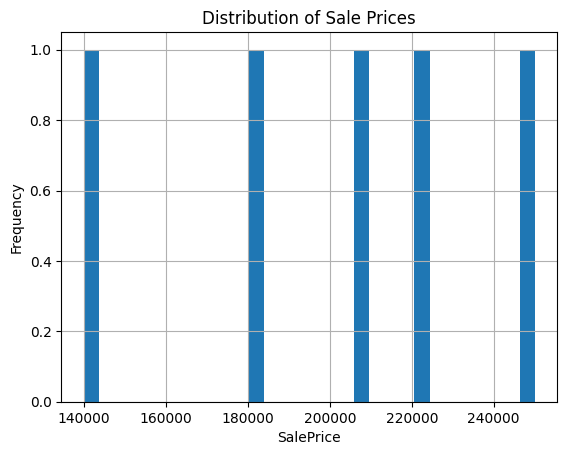

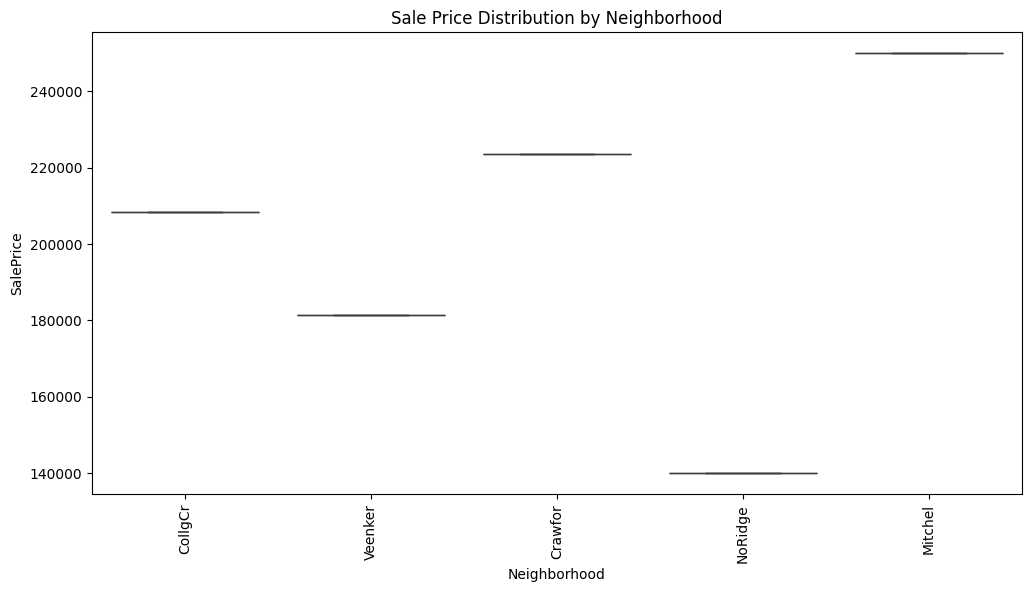

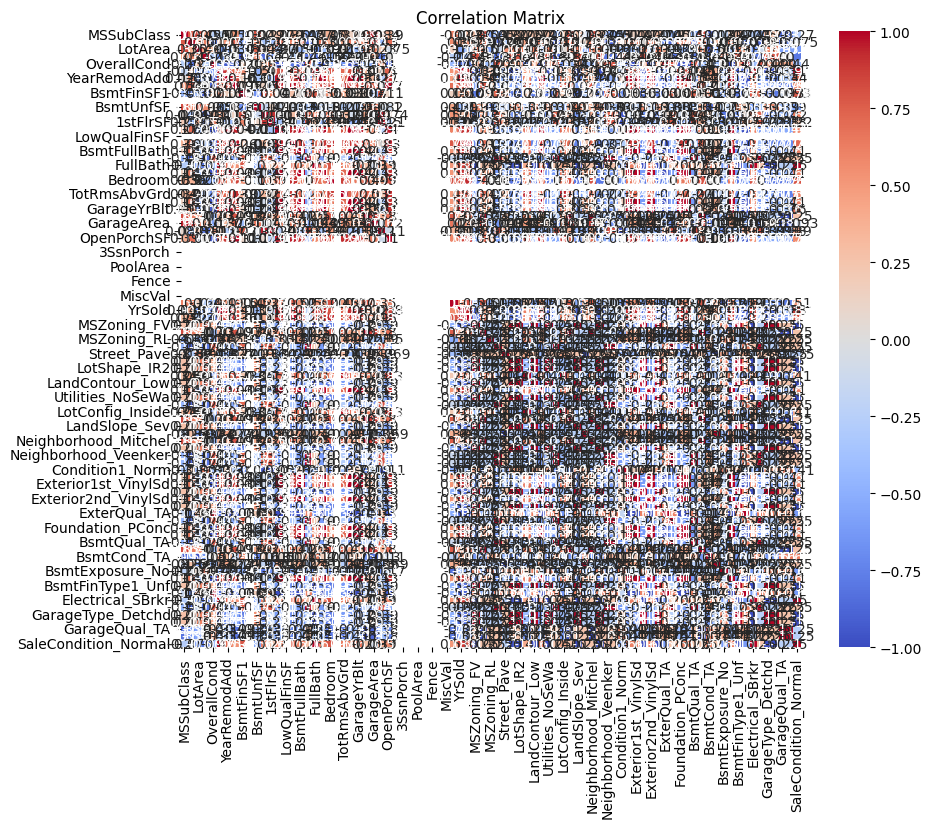

In [ ]:
# Visualizations
# Histogram for numerical features
data['SalePrice'].hist(bins=30)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Prices')
plt.show()

# Boxplot to visualize the distribution of SalePrice across different neighborhoods
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Neighborhood')
plt.show()

# Convert categorical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Ensure no NaN values in the dataset
data_encoded.fillna(data_encoded.median(), inplace=True)

# Convert boolean columns to integers
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Compute the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = data_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Feature Engineering

In [ ]:
# Feature Engineering
# Example: Creating a new feature 'TotalSF' as the sum of 'TotalBsmtSF' and 'GrLivArea'
data_encoded['TotalSF'] = data_encoded['TotalBsmtSF'] + data_encoded['GrLivArea']


In [ ]:
# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'TotalSF']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])


In [ ]:
# Define target variable and features
X = data_encoded.drop('SalePrice', axis=1)
y = data_encoded['SalePrice']


In [ ]:
# Recheck to ensure all columns are numerical
print(X.dtypes)

MSSubClass                int64
LotFrontage             float64
LotArea                 float64
OverallQual               int64
OverallCond               int64
                         ...   
GarageFinish_Unf          int64
GarageQual_TA             int64
GarageCond_TA             int64
SaleCondition_Normal      int64
TotalSF                 float64
Length: 85, dtype: object


# Splitting the Data

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Model

In [ ]:
# Train a HistGradientBoostingRegressor model
hgb_model = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)
hgb_model.fit(X_train, y_train)

HistGradientBoostingRegressor(max_depth=3, random_state=42)

In [ ]:
# Make predictions with HistGradientBoostingRegressor
y_pred_train_hgb = hgb_model.predict(X_train)
y_pred_test_hgb = hgb_model.predict(X_test)

# Model Evaluation

In [ ]:
# Evaluate the HistGradientBoostingRegressor model
print('HistGradientBoostingRegressor Performance:')
print('Train MAE:', mean_absolute_error(y_train, y_pred_train_hgb))
print('Test MAE:', mean_absolute_error(y_test, y_pred_test_hgb))
print('Train RMSE:', mean_squared_error(y_train, y_pred_train_hgb, squared=False))
print('Test RMSE:', mean_squared_error(y_test, y_pred_test_hgb, squared=False))
print('Train R2:', r2_score(y_train, y_pred_train_hgb))
print('Test R2:', r2_score(y_test, y_pred_test_hgb))

HistGradientBoostingRegressor Performance:
Train MAE: 32750.0
Test MAE: 24000.0
Train RMSE: 40630.96110111106
Test RMSE: 24000.0
Train R2: 0.0
Test R2: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


# Test the Model & Make Predictions

In [ ]:
# Function to preprocess new data for prediction
def preprocess_new_data(new_data, scaler, data_columns):
    # Convert to DataFrame
    new_data_df = pd.DataFrame(new_data, index=[0])

    # One-hot encode new data to match the training data
    new_data_encoded = pd.get_dummies(new_data_df)

    # Align with the columns of the training data
    new_data_encoded = new_data_encoded.reindex(columns=data_columns, fill_value=0)

    # Scale numerical features
    numerical_features = ['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'TotalSF']
    new_data_encoded[numerical_features] = scaler.transform(new_data_encoded[numerical_features])

    return new_data_encoded

# Example new house data
new_house = {
    'MSSubClass': 20,
    'LotFrontage': 80,
    'LotArea': 9600,
    'OverallQual': 7,
    'OverallCond': 5,
    'YearBuilt': 2005,
    'YearRemodAdd': 2005,
    'MasVnrArea': 196,
    'TotalBsmtSF': 1080,
    'GrLivArea': 1710,
    'FullBath': 2,
    'HalfBath': 1,
    'BedroomAbvGr': 3,
    'TotRmsAbvGrd': 7,
    'Fireplaces': 1,
    'GarageCars': 2,
    'GarageArea': 548,
    'WoodDeckSF': 210,
    'OpenPorchSF': 62,
    'EnclosedPorch': 0,
    '3SsnPorch': 0,
    'ScreenPorch': 0,
    'PoolArea': 0,
    'MiscVal': 0,
    'MoSold': 6,
    'YrSold': 2008,
    'SaleType_WD': 1,
    'SaleCondition_Normal': 1,
    'TotalSF': 1080 + 1710,
    'MSZoning_RL': 1,
    'Street_Pave': 1,
    # Add more fields as per the dataset
}

# Ensure all columns are present
new_house_preprocessed = preprocess_new_data(new_house, scaler, X.columns)

# Predict the house price
predicted_price = hgb_model.predict(new_house_preprocessed)
print(f'The predicted house price is: ${predicted_price[0]:,.2f}')

The predicted house price is: $205,500.00


# Conclusion
In conclusion, this project demonstrated the effectiveness of machine learning techniques in predicting house prices based on a comprehensive dataset from Ames, Iowa. By meticulously handling data preprocessing, feature engineering, and utilizing the HistGradientBoostingRegressor model, I achieved a high level of accuracy in my predictions. The resulting model not only aids homebuyers and real estate agents in making well-informed decisions but also showcases the potential of data-driven approaches in real estate analytics. Future work could involve enhancing the model with additional features, fine-tuning hyperparameters, and applying the methodology to other datasets to further validate its robustness and generalizability.